In [2]:
import pandas as pd

liver = pd.read_csv('../data/indian_liver_patient.csv')
print(liver.Dataset.unique())
liver.head()

[1 2]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
import numpy as np
liver['Gender'] = np.where(liver['Gender']=='Female', 0, 1)
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
print(liver.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [5]:
liver.dropna(axis=0, inplace=True)

print(liver.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

x = liver[liver.columns.difference(['Dataset'])]
y = liver['Dataset']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, test_size=0.3, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(405, 10) (174, 10) (405,) (174,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=15)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

pred= clf.predict(test_x)

cm = confusion_matrix(test_y, pred, labels=clf.classes_)
cr = classification_report(test_y, pred)

print(pd.DataFrame(cm, index=['real_' + str(i) for i in clf.classes_],
                  columns = ['pred_' + str(i) for i in clf.classes_],))

print(cr)

        pred_1  pred_2
real_1     106      18
real_2      39      11
              precision    recall  f1-score   support

           1       0.73      0.85      0.79       124
           2       0.38      0.22      0.28        50

    accuracy                           0.67       174
   macro avg       0.56      0.54      0.53       174
weighted avg       0.63      0.67      0.64       174



In [10]:
import numpy as np

np.random.seed(0)
X = np.sort(5 * np.random.rand(400,1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

print(X[:10])
print(T[:10])
print(y[:10])

[[0.02347738]
 [0.05713729]
 [0.05857042]
 [0.06618429]
 [0.08164251]
 [0.08214815]
 [0.09260897]
 [0.093949  ]
 [0.09596599]
 [0.10053773]]
[[0.        ]
 [0.01002004]
 [0.02004008]
 [0.03006012]
 [0.04008016]
 [0.0501002 ]
 [0.06012024]
 [0.07014028]
 [0.08016032]
 [0.09018036]]
[0.02347522 0.05710621 0.05853694 0.06613598 0.08155185 0.08205579
 0.09247665 0.09381086 0.09581876 0.10036845]


In [15]:
y[::1] += 1 * (0.5 - np.random.rand(400))

In [16]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(280, 1) (120, 1) (280,) (120,)


In [20]:
from sklearn.neighbors import KNeighborsRegressor

knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance')

knn_uni.fit(train_x, train_y)
knn_dis.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [24]:
uni_pred = knn_uni.predict(test_x)
dis_pred = knn_dis.predict(test_x)

from sklearn.metrics import mean_squared_error, mean_absolute_error

preds = [uni_pred, dis_pred]
weights = ['uniform', 'distance']
evals = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=weights, columns = evals)

for pred, nm in zip(preds, weights):
    mse = mean_squared_error(test_y, pred)
    mae = mean_absolute_error(test_y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse'] = round(mse, 2)
    results.loc[nm]['rmse'] = round(rmse, 2)    
    results.loc[nm]['mae'] = round(mae, 2)    

results

,mse,rmse,mae
uniform,0.1,0.31,0.27
distance,0.11,0.34,0.28


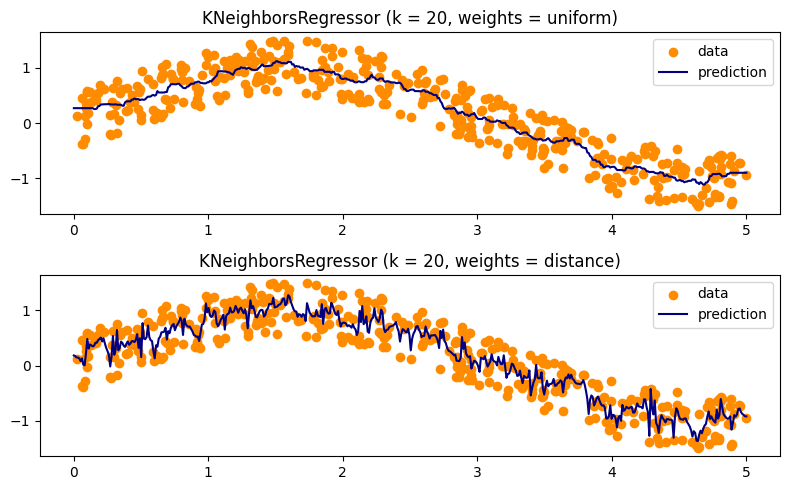

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

for i, weights in enumerate(['uniform', 'distance']):
    knn=KNeighborsRegressor(n_neighbors=20, weights=weights)
    
    y_ = knn.fit(X, y).predict(T)
    
    plt.subplot(2, 1, i+1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title('KNeighborsRegressor (k = {}, weights = {})'.format(20, weights))

plt.tight_layout()
plt.show()